In [1]:
%load_ext autoreload
%autoreload 2

In [112]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [93]:
df = pd.DataFrame(index = range(36*11*3), columns = ['dataset', 'k', 'global complexity', 'higher complexity', 'lower complexity', 'metric', 'score'])

i = 0

for experiment in [
'a9a',
'appendicitis',
'australian',
'backache',
'banknote',
'breastcancer',
'bupa',
'cleve',
'cod-rna',
'colon-cancer',
'diabetes',
'flare',
'fourclass',
'german_numer',
'haberman',
'heart',
'housevotes84',
'ilpd',
'ionosphere',
'kr_vs_kp',
'liver-disorders',
'mammographic',
'mushroom',
'r2',
'sonar',
'splice',
'svmguide1',
'svmguide3',
'transfusion',
'w1a',
'w2a',
'w3a',
'w4a',
'w5a',
'w6a',
'w7a',
# 'w8a'
]:
    
    with open(f'../results/sensitivity/{experiment}.json', 'r') as fin:
        exp = json.load(fin)
        
    with open(f'../results/errors/{experiment}.json', 'r') as fin:
        error = json.load(fin)
    
    for j in range(1, 12):
        for mc in ['kdn', 'dynamic_kdn', 'dynamic_kdn_full_zone']:
            df.loc[i, 'score'] = error[experiment]['score']
            df.loc[i, 'dataset'] = experiment
            df.loc[i, 'k'] = j
            df.loc[i, 'metric'] = mc
            df.loc[i, 'global complexity'] = exp[experiment][str(j)][mc]['global']
            df.loc[i, 'higher complexity'] = max(exp[experiment][str(j)][mc]['class 0'], exp[experiment][str(j)][mc]['class 1'])
            df.loc[i, 'lower complexity'] = min(exp[experiment][str(j)][mc]['class 0'], exp[experiment][str(j)][mc]['class 1'])
            i += 1
df['global absolute score difference'] = df['score'] - (1 - df['global complexity'])
df['higher absolute score difference'] = df['score'] - (1 - df['higher complexity'])
df['lower absolute score difference'] = df['score'] - (1 - df['lower complexity'])
df['global complexity score'] = 1 - df['global complexity']
df['higher complexity score'] = 1 - df['higher complexity']
df['lower complexity score'] = 1 - df['lower complexity']

In [109]:
for col in ['global complexity', 'higher complexity',
       'lower complexity', 'score',
       'global absolute score difference', 'higher absolute score difference',
       'lower absolute score difference', 'global complexity score',
       'higher complexity score', 'lower complexity score']:
    df[col] = df[col].astype(float)

In [206]:
df[(df['k'] == 5) & (df['dataset'] == 'a9a')]

,dataset,k,global complexity,higher complexity,lower complexity,metric,score,global absolute score difference,higher absolute score difference,lower absolute score difference,global complexity score,higher complexity score,lower complexity score
12,a9a,5,0.210595,0.413952,0.146092,kdn,0.785837,-0.003568,0.199789,-0.068071,0.789405,0.586048,0.853908
13,a9a,5,0.220632,0.435448,0.152494,dynamic_kdn,0.785837,0.006469,0.221285,-0.061670,0.779368,0.564552,0.847506
14,a9a,5,0.070908,0.144469,0.047576,dynamic_kdn_full_zone,0.785837,-0.143255,-0.069694,-0.166588,0.929092,0.855531,0.952424


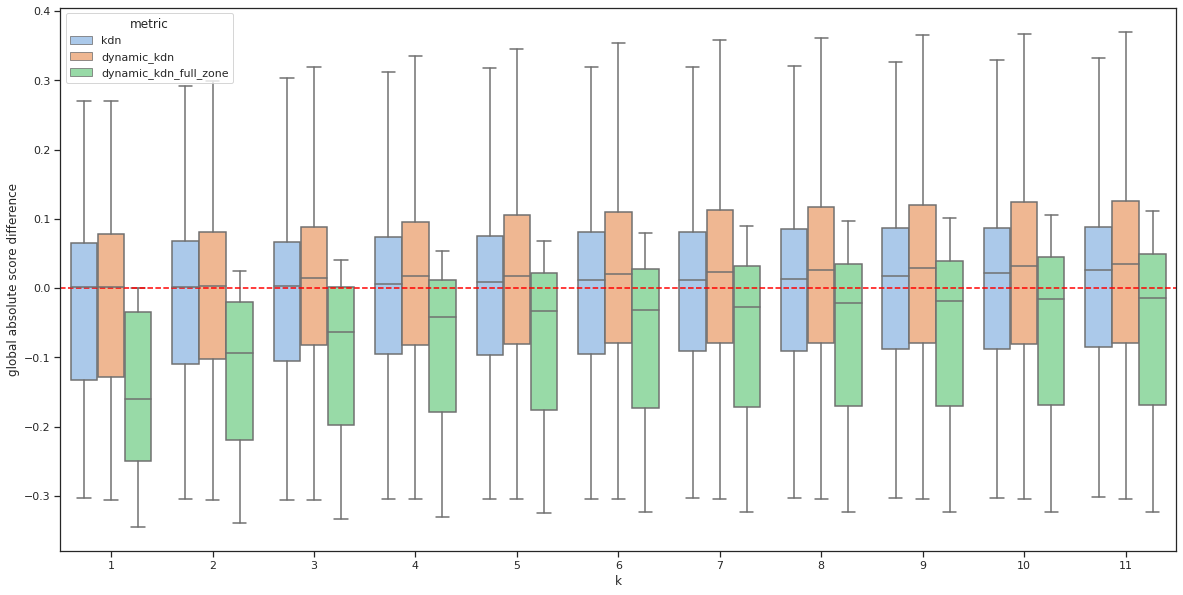

In [81]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=df, x="k", y="global absolute score difference", hue="metric")
plt.axhline(0, ls='--', c='red');

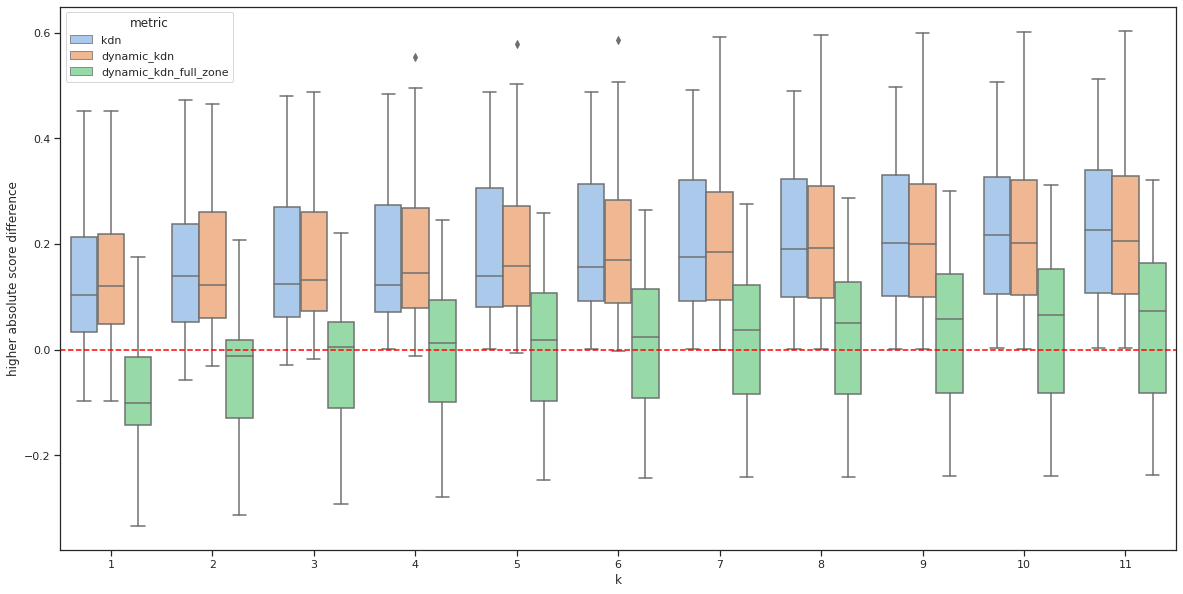

In [82]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=df, x="k", y="higher absolute score difference", hue="metric")
plt.axhline(0, ls='--', c='red');

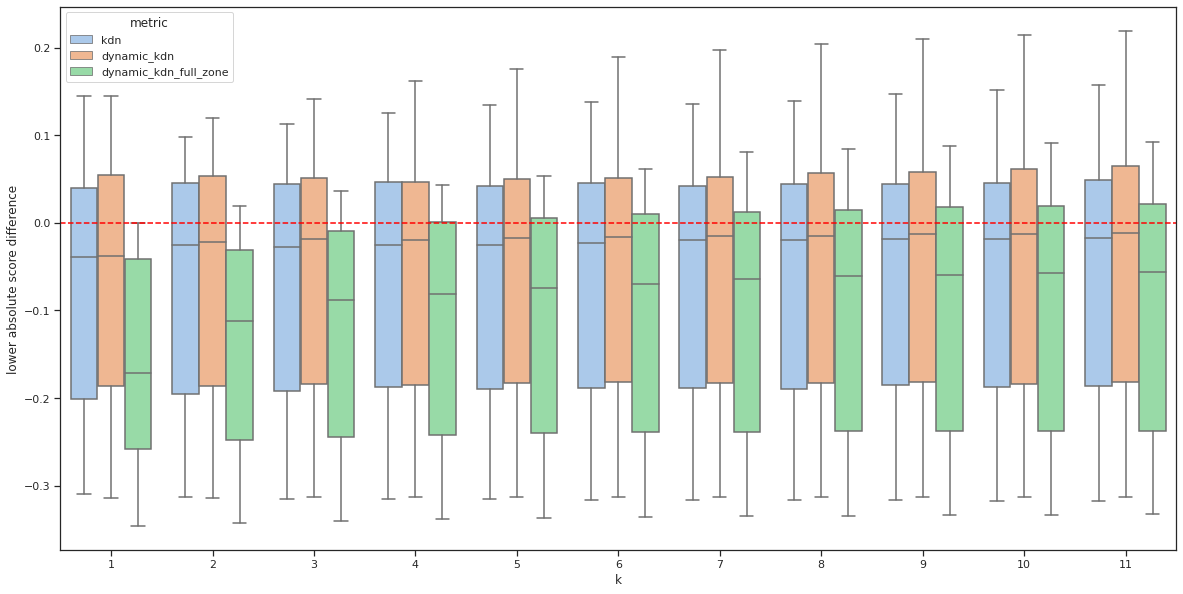

In [83]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=df, x="k", y="lower absolute score difference", hue="metric")
plt.axhline(0, ls='--', c='red');

In [96]:
def annotate(data, regressor='kdn'):
    slope, intercept, r, p, std_err = st.linregress(data[regressor],data['score'])
    ax = plt.gca()
    plt.text(.05, .85, f'r={r:.2f}, p={p:.2g}',
            transform=ax.transAxes)
    plt.text(.05, .95, f'y={intercept:.2f} + {slope:.2f} ({std_err:.2f})x ',
            transform=ax.transAxes)
    plt.show()

In [118]:
def plot_reg(k, metric, score):
    df_corr = df[(df['k'] == k) & (df['metric'] == metric)]
    g = sns.lmplot(x=score, y='score', data=df_corr)
    annotate(df_corr, score)

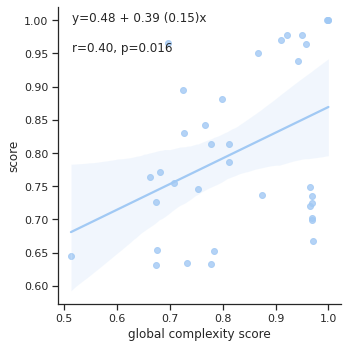

In [119]:
plot_reg(1, 'kdn', 'global complexity score')

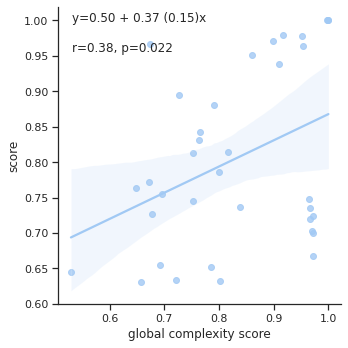

In [120]:
plot_reg(2, 'kdn', 'global complexity score')

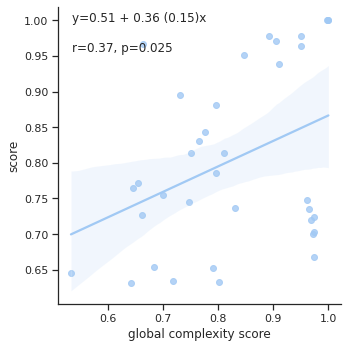

In [121]:
plot_reg(3, 'kdn', 'global complexity score')

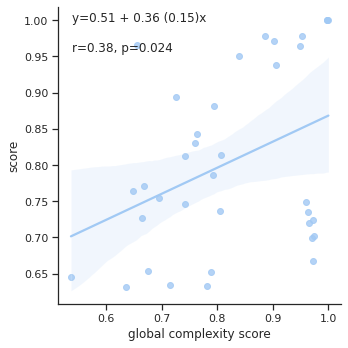

In [122]:
plot_reg(4, 'kdn', 'global complexity score')

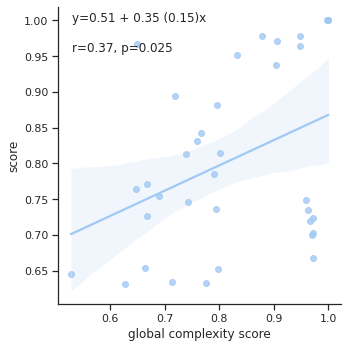

In [123]:
plot_reg(5, 'kdn', 'global complexity score')

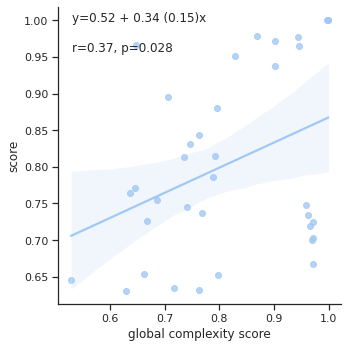

In [124]:
plot_reg(6, 'kdn', 'global complexity score')

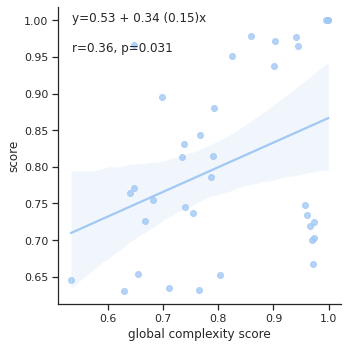

In [125]:
plot_reg(7, 'kdn', 'global complexity score')

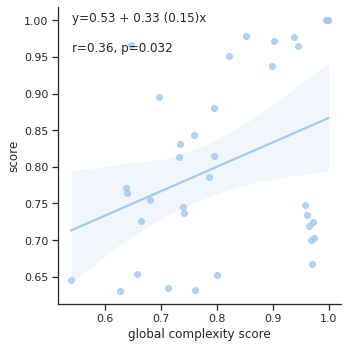

In [126]:
plot_reg(8, 'kdn', 'global complexity score')

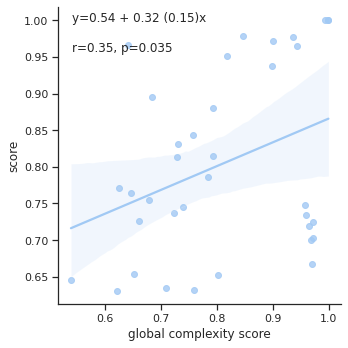

In [127]:
plot_reg(9, 'kdn', 'global complexity score')

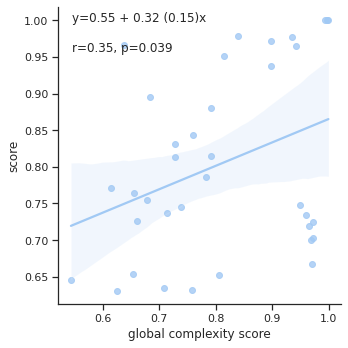

In [128]:
plot_reg(10, 'kdn', 'global complexity score')

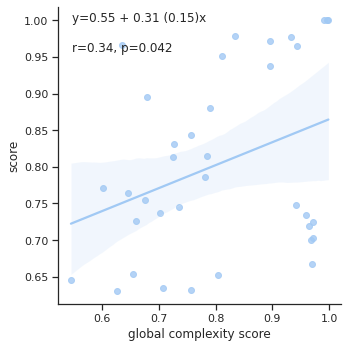

In [129]:
plot_reg(11, 'kdn', 'global complexity score')

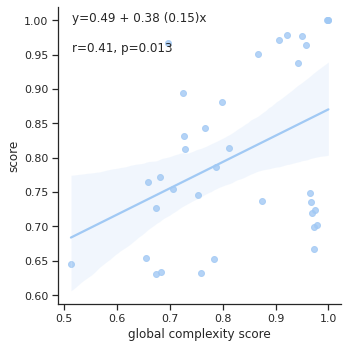

In [130]:
plot_reg(1, 'dynamic_kdn', 'global complexity score')

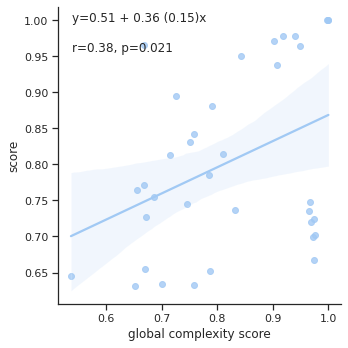

In [131]:
plot_reg(2, 'dynamic_kdn', 'global complexity score')

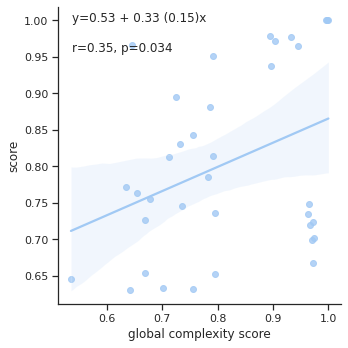

In [132]:
plot_reg(3, 'dynamic_kdn', 'global complexity score')

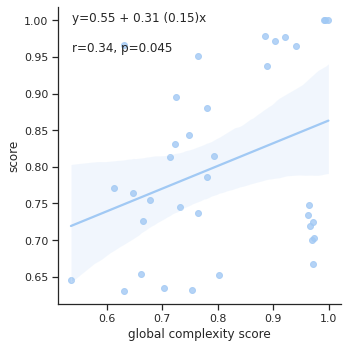

In [133]:
plot_reg(4, 'dynamic_kdn', 'global complexity score')

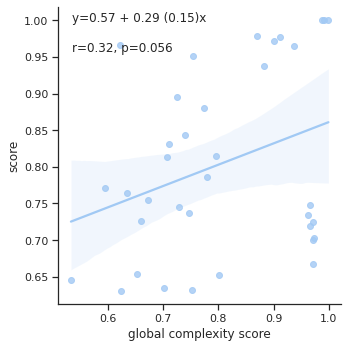

In [134]:
plot_reg(5, 'dynamic_kdn', 'global complexity score')

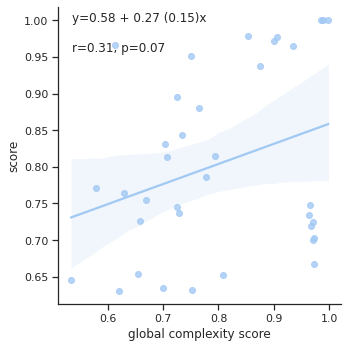

In [135]:
plot_reg(6, 'dynamic_kdn', 'global complexity score')

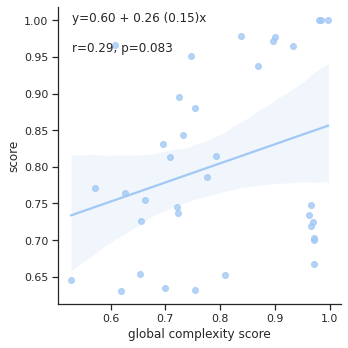

In [136]:
plot_reg(7, 'dynamic_kdn', 'global complexity score')

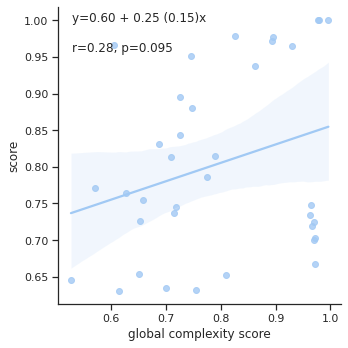

In [137]:
plot_reg(8, 'dynamic_kdn', 'global complexity score')

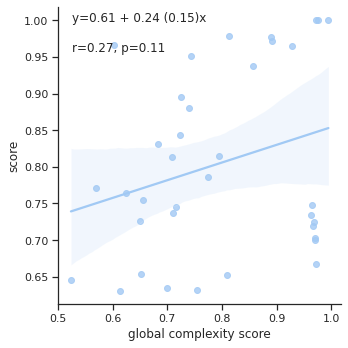

In [138]:
plot_reg(9, 'dynamic_kdn', 'global complexity score')

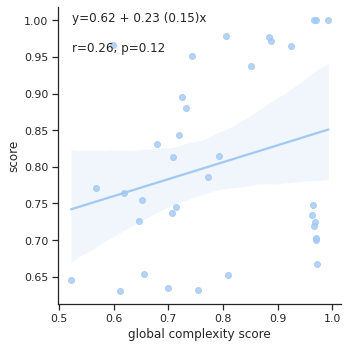

In [139]:
plot_reg(10, 'dynamic_kdn', 'global complexity score')

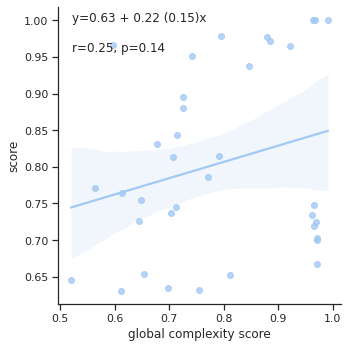

In [140]:
plot_reg(11, 'dynamic_kdn', 'global complexity score')

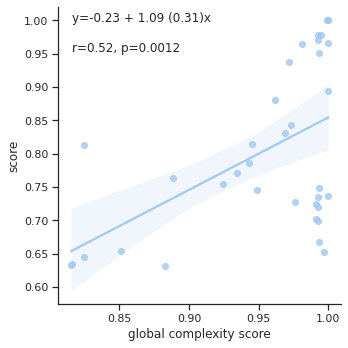

In [141]:
plot_reg(1, 'dynamic_kdn_full_zone', 'global complexity score')

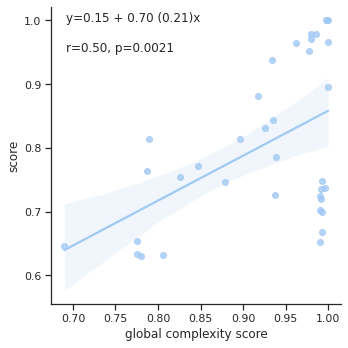

In [142]:
plot_reg(2, 'dynamic_kdn_full_zone', 'global complexity score')

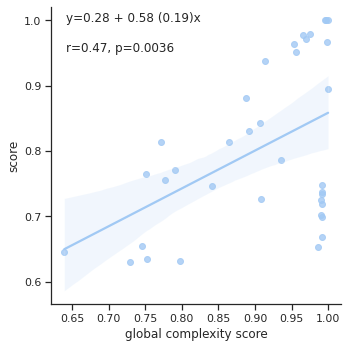

In [143]:
plot_reg(3, 'dynamic_kdn_full_zone', 'global complexity score')

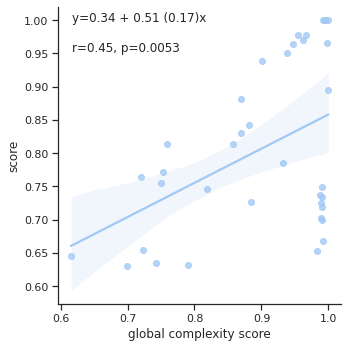

In [144]:
plot_reg(4, 'dynamic_kdn_full_zone', 'global complexity score')

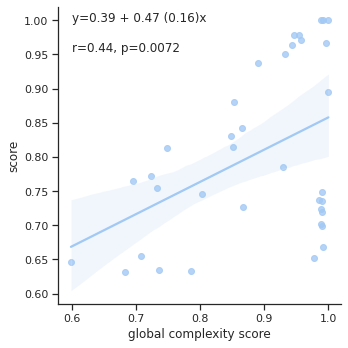

In [145]:
plot_reg(5, 'dynamic_kdn_full_zone', 'global complexity score')

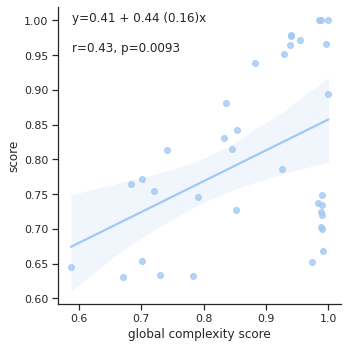

In [146]:
plot_reg(6, 'dynamic_kdn_full_zone', 'global complexity score')

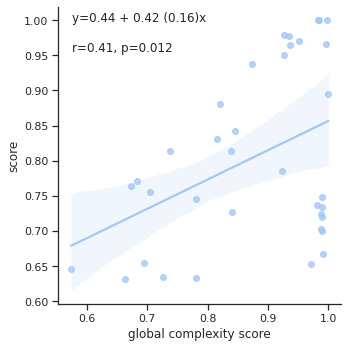

In [147]:
plot_reg(7, 'dynamic_kdn_full_zone', 'global complexity score')

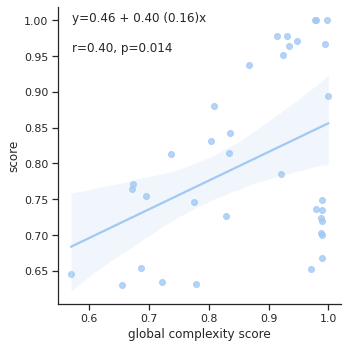

In [148]:
plot_reg(8, 'dynamic_kdn_full_zone', 'global complexity score')

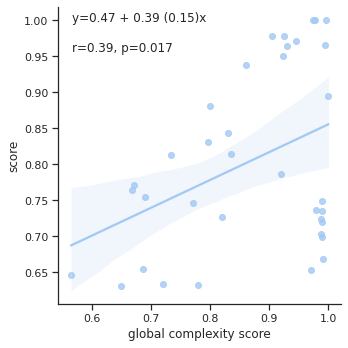

In [149]:
plot_reg(9, 'dynamic_kdn_full_zone', 'global complexity score')

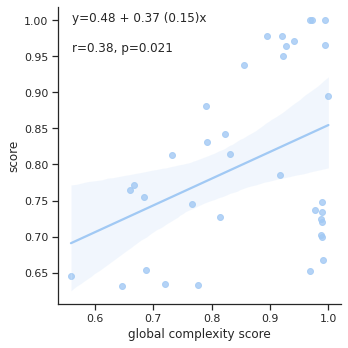

In [150]:
plot_reg(10, 'dynamic_kdn_full_zone', 'global complexity score')

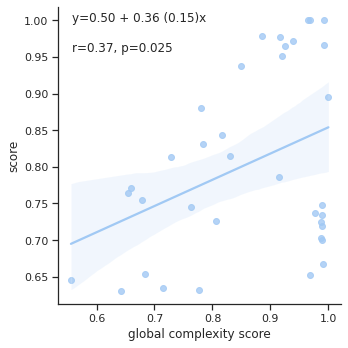

In [151]:
plot_reg(11, 'dynamic_kdn_full_zone', 'global complexity score')

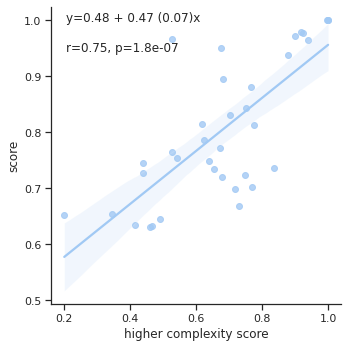

In [152]:
plot_reg(1, 'kdn', 'higher complexity score')

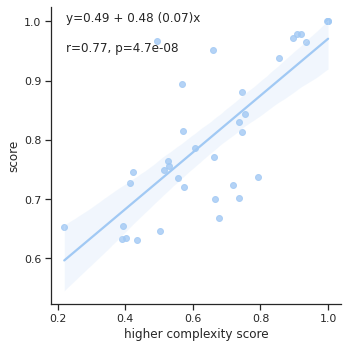

In [153]:
plot_reg(2, 'kdn', 'higher complexity score')

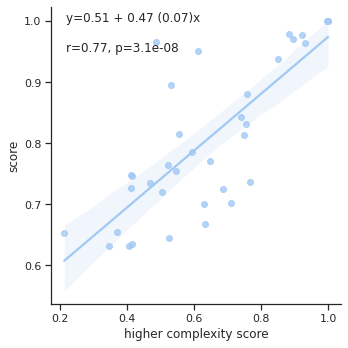

In [154]:
plot_reg(3, 'kdn', 'higher complexity score')

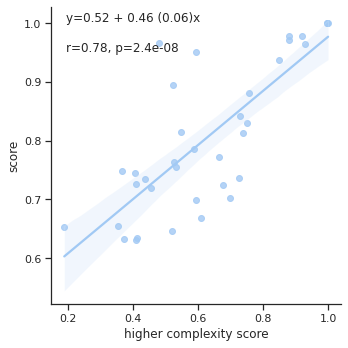

In [155]:
plot_reg(4, 'kdn', 'higher complexity score')

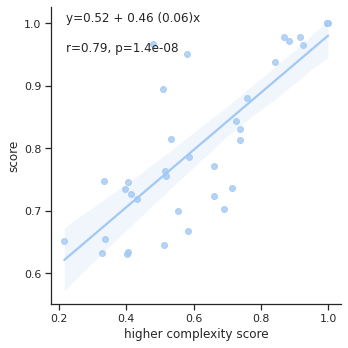

In [156]:
plot_reg(5, 'kdn', 'higher complexity score')

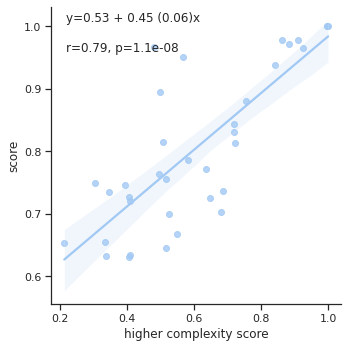

In [157]:
plot_reg(6, 'kdn', 'higher complexity score')

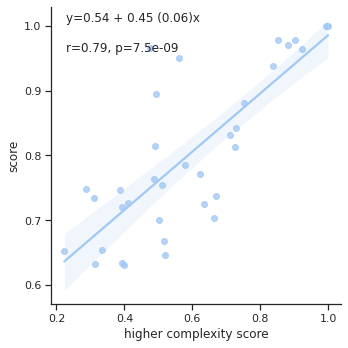

In [158]:
plot_reg(7, 'kdn', 'higher complexity score')

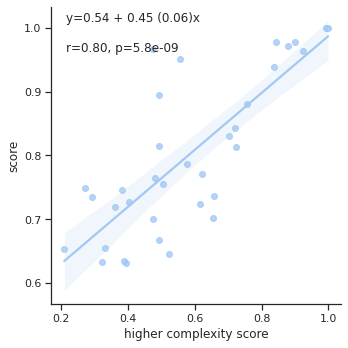

In [159]:
plot_reg(8, 'kdn', 'higher complexity score')

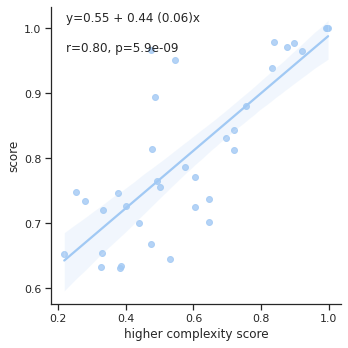

In [160]:
plot_reg(9, 'kdn', 'higher complexity score')

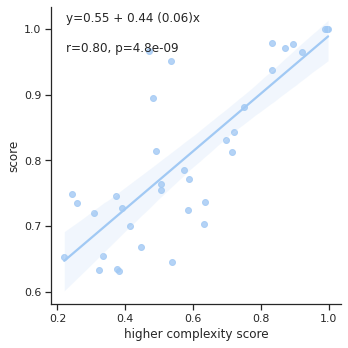

In [161]:
plot_reg(10, 'kdn', 'higher complexity score')

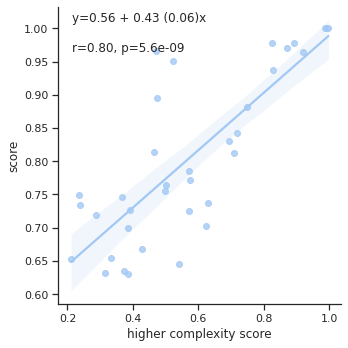

In [162]:
plot_reg(11, 'kdn', 'higher complexity score')

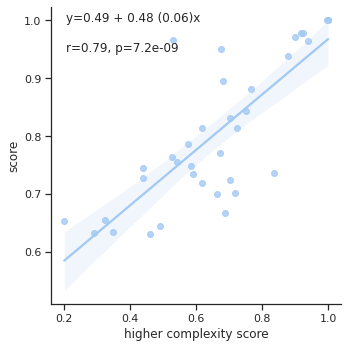

In [163]:
plot_reg(1, 'dynamic_kdn', 'higher complexity score')

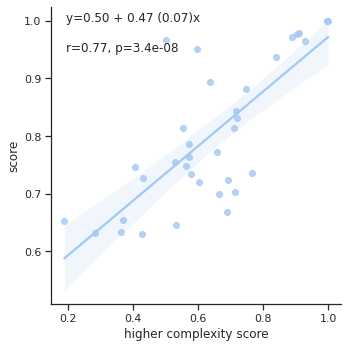

In [164]:
plot_reg(2, 'dynamic_kdn', 'higher complexity score')

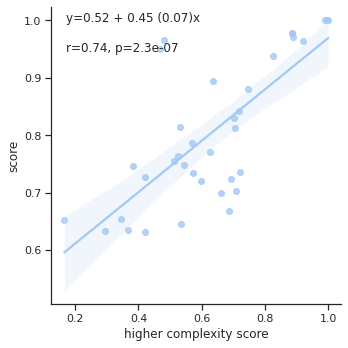

In [165]:
plot_reg(3, 'dynamic_kdn', 'higher complexity score')

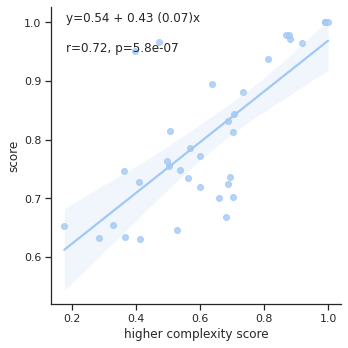

In [166]:
plot_reg(4, 'dynamic_kdn', 'higher complexity score')

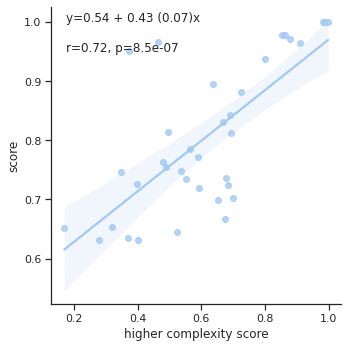

In [167]:
plot_reg(5, 'dynamic_kdn', 'higher complexity score')

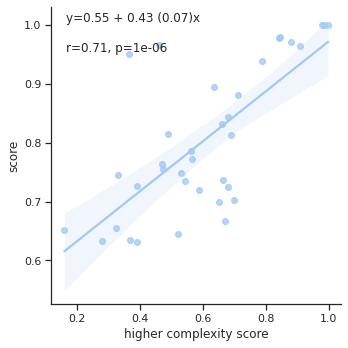

In [168]:
plot_reg(6, 'dynamic_kdn', 'higher complexity score')

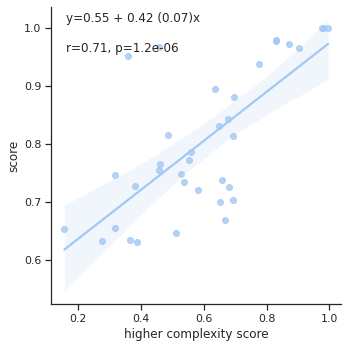

In [169]:
plot_reg(7, 'dynamic_kdn', 'higher complexity score')

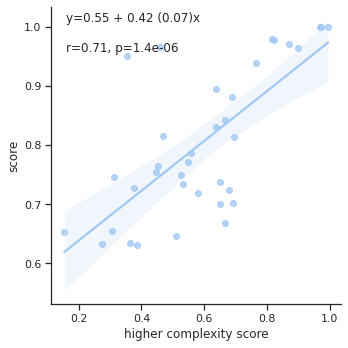

In [170]:
plot_reg(8, 'dynamic_kdn', 'higher complexity score')

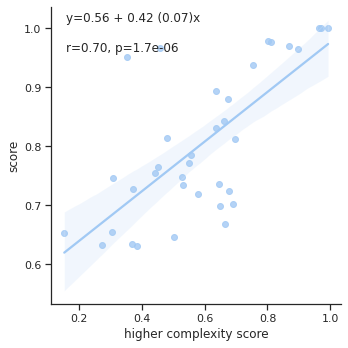

In [171]:
plot_reg(9, 'dynamic_kdn', 'higher complexity score')

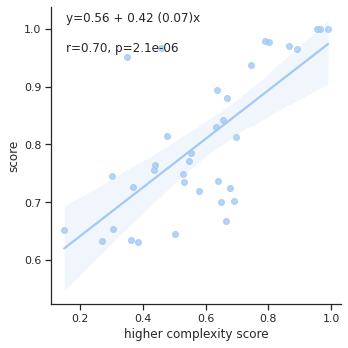

In [172]:
plot_reg(10, 'dynamic_kdn', 'higher complexity score')

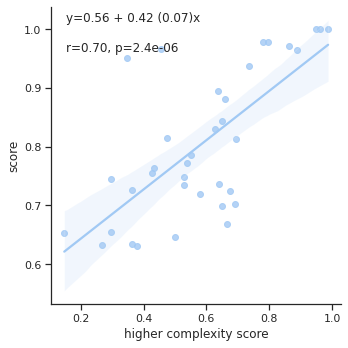

In [173]:
plot_reg(11, 'dynamic_kdn', 'higher complexity score')

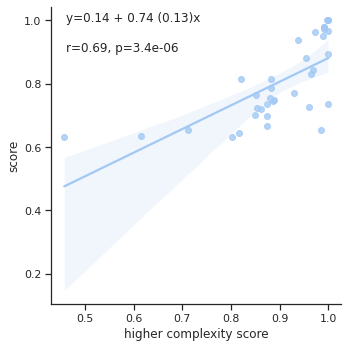

In [174]:
plot_reg(1, 'dynamic_kdn_full_zone', 'higher complexity score')

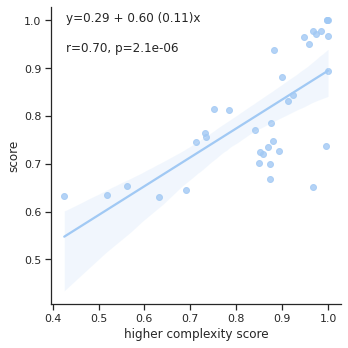

In [175]:
plot_reg(2, 'dynamic_kdn_full_zone', 'higher complexity score')

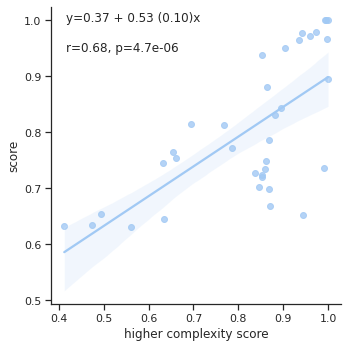

In [176]:
plot_reg(3, 'dynamic_kdn_full_zone', 'higher complexity score')

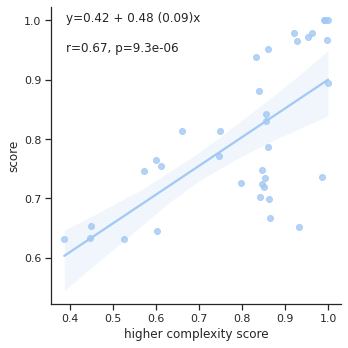

In [177]:
plot_reg(4, 'dynamic_kdn_full_zone', 'higher complexity score')

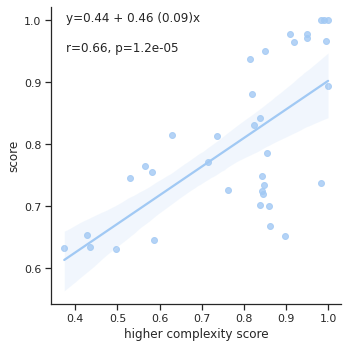

In [178]:
plot_reg(5, 'dynamic_kdn_full_zone', 'higher complexity score')

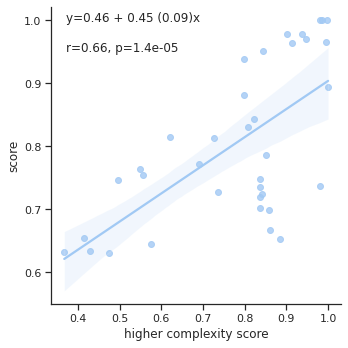

In [179]:
plot_reg(6, 'dynamic_kdn_full_zone', 'higher complexity score')

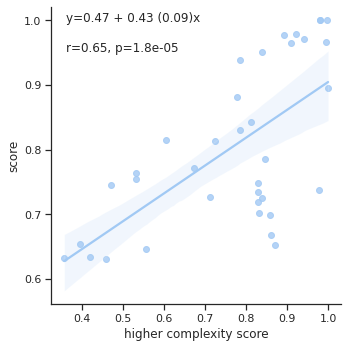

In [180]:
plot_reg(7, 'dynamic_kdn_full_zone', 'higher complexity score')

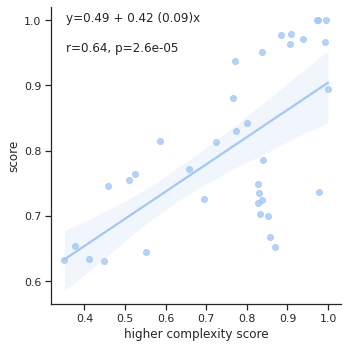

In [181]:
plot_reg(8, 'dynamic_kdn_full_zone', 'higher complexity score')

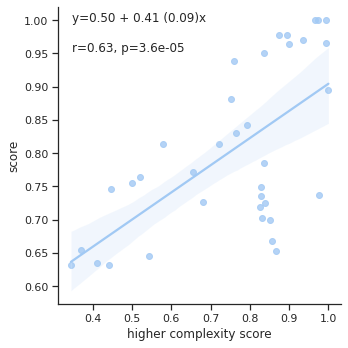

In [182]:
plot_reg(9, 'dynamic_kdn_full_zone', 'higher complexity score')

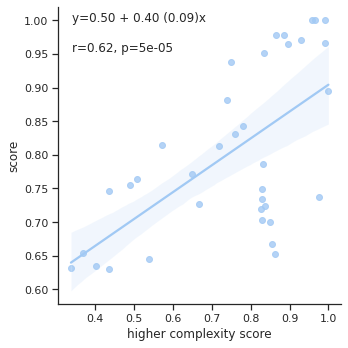

In [183]:
plot_reg(10, 'dynamic_kdn_full_zone', 'higher complexity score')

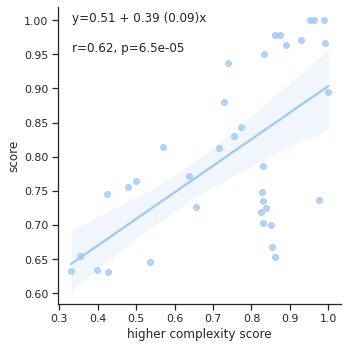

In [184]:
plot_reg(11, 'dynamic_kdn_full_zone', 'higher complexity score')

In [ ]:
from scipy import stats
stats.spearmanr()

In [193]:
def scorr(k, metric, score):
    df_corr = df[(df['k'] == k) & (df['metric'] == metric)]
    return st.spearmanr(df_corr['score'], df_corr[score])[0]

In [197]:
for i in range(1, 12):
    print(scorr(i, 'kdn', 'global complexity score'))

0.3133569417939899
0.3035530481661626
0.3153965089088628
0.3220906388938672
0.31719877467405627
0.30844491238597355
0.31101957776482136
0.30432544777981696
0.3063851800828953
0.3097322450753975
0.30123584932519953


In [198]:
for i in range(1, 12):
    print(scorr(i, 'dynamic_kdn', 'global complexity score'))

0.34245253293837846
0.318743573901365
0.2875901228173059
0.2909371878098081
0.2826982585974949
0.2801235932186471
0.27754892783979923
0.27188466400633393
0.2713697309305643
0.22888775217957466
0.19773430109551562


In [199]:
for i in range(1, 12):
    print(scorr(i, 'dynamic_kdn_full_zone', 'global complexity score'))

0.5013526073193977
0.4057672637064226
0.39778580103199424
0.3913491375848746
0.3416580957731109
0.30715757969654955
0.2924819870371168
0.2754891955367209
0.27497426246095136
0.2713697309305643
0.2623584021045968


In [201]:
for i in range(1, 12):
    print(scorr(i, 'kdn', 'higher complexity score'))

0.7065336469044439
0.7317199006685616
0.7500000248583814
0.7463954933279944
0.7577240209949251
0.7378990975777965
0.7381565641156812
0.7579814875328098
0.7657054836693534
0.7631308182905056
0.7639032179041598


In [202]:
for i in range(1, 12):
    print(scorr(i, 'dynamic_kdn', 'higher complexity score'))

0.7613775487960789
0.7247683041456724
0.6943872526752676
0.6822863253946827
0.6673532661973651
0.6557672719925498
0.6521627404621627
0.6549948723788954
0.6477858093181215
0.6454686104771583
0.63748714780273


In [203]:
for i in range(1, 12):
    print(scorr(i, 'dynamic_kdn_full_zone', 'higher complexity score'))

0.7963416799713556
0.7479402925553031
0.7033985815012351
0.6359423485754212
0.6189495570750254
0.614572625930984
0.6130278267036753
0.5993821001957815
0.5960350352032794
0.5932029032865467
0.5816169090817314
